    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

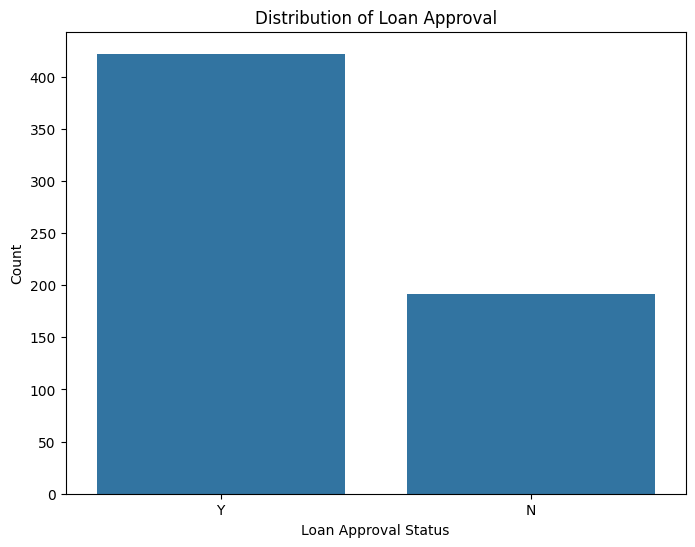

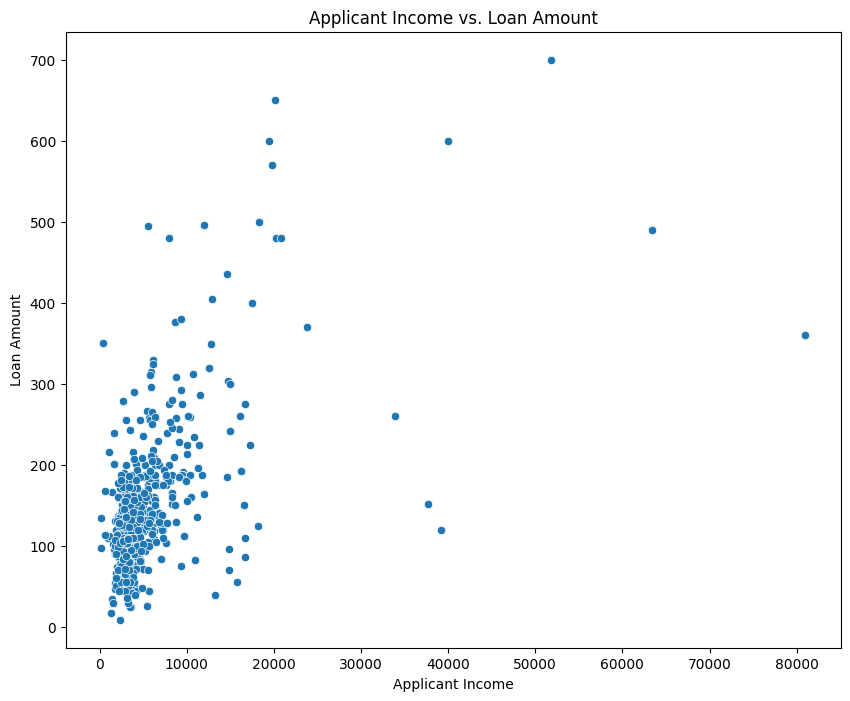

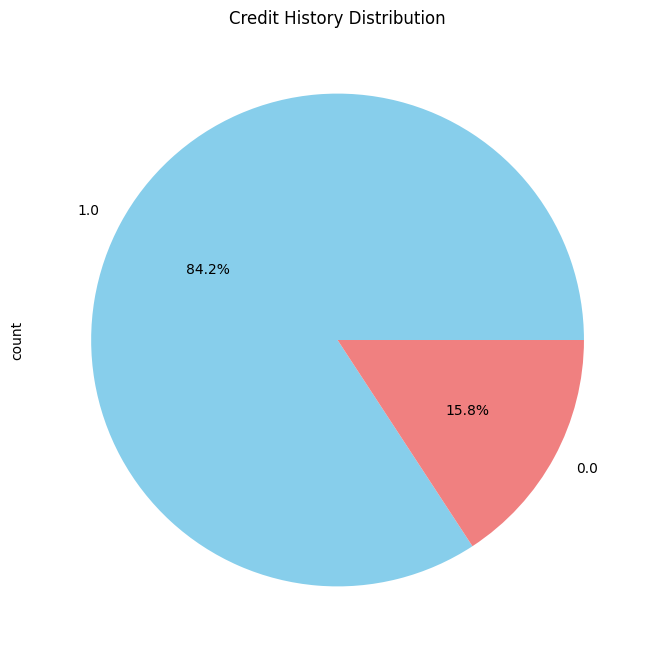

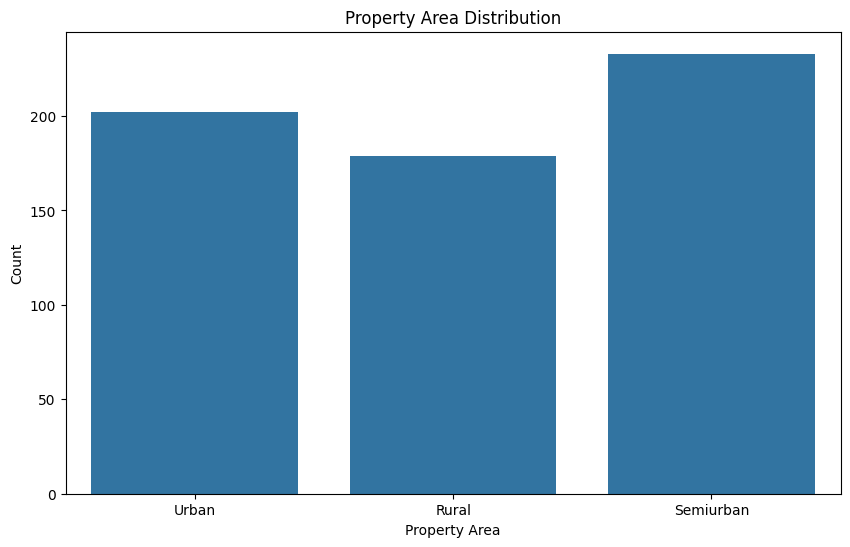

In [34]:
"""Milestone 1: Business Problem Narrative and Graphical Analysis Overview

Business Problem:
The aim of this analysis/model building project is to address the challenges faced by a finance company 
that provides home loans. 
The company wants to streamline and automate its loan eligibility process by leveraging machine learning. 
The primary problem is to predict whether a customer is eligible for a home loan based on various factors 
such as gender, marital status, education, income, credit history, and others. The target for the model is
to accurately classify loan applications into two categories: approved (Y) or not approved (N).
The data set used for this project is obtained from kaggle
https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set

"""

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
df = pd.read_csv("/Users/tvvr/Downloads/Loan_Train.csv")
# Assuming your data is stored in a variable named 'df'

print(df.head())
# Graphical Analysis 1: Distribution of Loan Approval

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Approval')
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.savefig('link_to_image_1')
"""
Distribution of Loan Approval:
In this bar chart, we visualize the distribution of loan approvals (Y) and non-approvals (N) in the dataset. 
This provides an initial understanding of the balance between approved and rejected loans.
Insight: The dataset appears to have a reasonably balanced distribution of approved and non-approved loans, 
which is crucial for training a reliable classification model.

"""
plt.show()

# Graphical Analysis 2: Applicant Income vs. Loan Amount
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.savefig('link_to_image_2')
"""
Applicant Income vs. Loan Amount:
This scatter plot illustrates the relationship between applicant income and the loan amount requested. 
It helps in identifying any patterns or trends in how income levels relate to the loan amounts sought.
Insight: There seems to be a positive correlation between applicant income and the loan amount, indicating that 
individuals with higher incomes tend to apply for larger loans.
"""

plt.show()

# Graphical Analysis 3: Credit History Distribution
plt.figure(figsize=(8, 8))
df['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Credit History Distribution')
plt.savefig('link_to_image_3')
"""
A pie chart depicting the distribution of credit history status among loan applicants. This provides insights into 
the creditworthiness of the applicants.
Insight : A significant portion of applicants have a positive credit history, which bodes well for the overall 
creditworthiness of the dataset. However, it also highlights the presence of applicants with no credit history.

"""
plt.show()

# Graphical Analysis 4: Property Area Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', data=df)
plt.title('Property Area Distribution')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.savefig('link_to_image_4')

"""
This bar chart visualizes the distribution of loan applicants across different property areas: Urban, Semi-Urban, and Rural. 
Understanding this distribution is essential for assessing the geographical scope of the loan applications.
Insight: The majority of loan applicants are from Semi-Urban areas, followed by Urban and Rural areas. 
This information can guide the company in tailoring its loan products to suit the preferences and needs of applicants 
in specific regions.
"""

plt.show()


In [ ]:
"""
Conclusion:
In this initial analysis, we've gained valuable insights into the distribution of loan approvals, 
the relationship between income and loan amount, the credit history of applicants, and the geographical
distribution of loan applicants. These insights lay the foundation for further exploration and model 
development, helping the finance company make data-driven decisions in automating the loan eligibility 
process. The next steps involve data cleaning, feature engineering, and selecting an appropriate machine 
learning model for predicting loan eligibility.
"""

In [39]:
""" ************************************* MILESTONE 2 *************************************  """
"""
The overall purpose of this milestone is to explore, clean, and preprocess the dataset, including handling missing values,
creating new features, and converting categorical variables into a format suitable for machine learning models.
"""

# This configuration sets the interactive shell to display the output of all expressions in a cell.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display the size of the DataFrame - Prints the number of rows and columns in the DataFrame.

df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

# Display the total number of elements in the DataFrame - Prints the total number of elements in the DataFrame.

df_size = df.size
print("Total number of elements in the DataFrame:", df_size)


# Display columns and their data types -Prints the names and data types of all columns in the DataFrame.

print("Columns and their data types:")
print(df.dtypes)

# Check for NaN values in the entire DataFrame
# Checks for NaN values in the DataFrame, prints columns with NaN values and their counts, and displays the
# data types of columns with NaN values.

nan_values = df.isna().sum()

# Display columns with NaN values and their counts
print("\nColumns with NaN values:")
nan_columns = nan_values[nan_values > 0]
print(nan_columns)

# Display the data type of columns with NaN values
print("\nData types of columns with NaN values:")
print(df[nan_columns.index].dtypes)


Number of rows: 614
Number of columns: 13
Total number of elements in the DataFrame: 7982
Columns and their data types:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Columns with NaN values:
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

Data types of columns with NaN values:
Gender               object
Married              object
Dependents           object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
dtype: object


In [40]:
# Prints columns with NaN values before and after handling them. 

# Check for NaN values in the entire DataFrame

nan_values = df.isna().sum()

# Display columns with NaN values and their counts

print("Columns with NaN values:")
print(nan_values[nan_values > 0])

# drop rows with NaN values
df = df.dropna()

# Verify that there are no NaN values left
print("Columns with NaN values after replacement:")
print(df.isna().sum())


# Display the size of the DataFrame
df_shape = df.shape
print("Number of rows after cleaning:", df_shape[0])
print("Number of columns after cleaning :", df_shape[1])

# Display the total number of elements in the DataFrame
df_size = df.size
print("Total number of elements in the DataFrame after cleaning:", df_size)


Columns with NaN values:
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64
Columns with NaN values after replacement:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Number of rows after cleaning: 480
Number of columns after cleaning : 13
Total number of elements in the DataFrame after cleaning: 6240


In [41]:
""" This code snippet drops the 'Loan_ID' column, creates a new 'TotalIncome' column, 
    applies log transformation to 'LoanAmount', creates a 'Debt_Income_Ratio' column, 
    imputes missing values in 'Credit_History' with mode, and 
    creates dummy variables for 'Property_Area'.

    1. Drop Unnecessary Features:

    Features like 'Loan_ID' are typically unique identifiers and do not contribute to the loan eligibility prediction. 
    Dropping them helps reduce noise in the dataset.

    2. Data Extraction/Selection:

    If there are features that can be combined to create more meaningful information, perform data extraction. 
    For example, combining 'ApplicantIncome' and 'CoapplicantIncome' to create 'TotalIncome'.

    3. Feature Transformation:

    Transform features if necessary to make them more suitable for modeling. For instance, applying a logarithmic 
    transformation to 'LoanAmount' to handle skewed data.

    4. Feature Engineering:

    Engineer new features that could capture important patterns. For example, creating a 'Debt_Income_Ratio' feature 
    by dividing 'LoanAmount' by 'TotalIncome'.

    5. Deal with Missing Data:

    Address missing data appropriately. For example, imputing missing values in 'Credit_History' with the mode.
    It's crucial to avoid simply dropping rows or columns without justification, as this can lead to loss of valuable information.

    6. Create Dummy Variables:

    Convert categorical variables into dummy variables. This is necessary for models that require numerical input. 
    For example, creating dummy variables for the 'Property_Area' feature.

    Process Explanation:

    The process begins by removing features that do not contribute meaningfully to the prediction task, such as unique 
    identifiers ('Loan_ID'). Data extraction and feature engineering steps aim to create new features that could enhance 
    the model's ability to capture patterns in the data. Feature transformation addresses the need for numerical stability 
    in certain features, while dealing with missing data ensures that no information is lost. 
    Finally, creating dummy variables is essential for handling categorical features in machine learning models.

    By following these steps, the dataset is prepared for model building and evaluation in the next milestone, 
    ensuring that the selected features are relevant and missing data is handled appropriately.

"""



# Dropping unnecessary features
df = df.drop(['Loan_ID'], axis=1)

# Data extraction: Creating 'TotalIncome'
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Feature transformation: Log transformation for 'LoanAmount'
df['LoanAmount_Log'] = np.log(df['LoanAmount'])

# Feature engineering: Creating 'Debt_Income_Ratio'
df['Debt_Income_Ratio'] = df['LoanAmount'] / df['TotalIncome']

# Handling missing data in 'Credit_History' by imputing with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Creating dummy variables for 'Property_Area'
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,LoanAmount_Log,Debt_Income_Ratio,Property_Area_Semiurban,Property_Area_Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,6091.0,4.852030,0.021015,False,False
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,3000.0,4.189655,0.022000,False,True
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,4941.0,4.787492,0.024287,False,True
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,6000.0,4.948760,0.023500,False,True
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,9613.0,5.587249,0.027775,False,True


In [63]:
# Display DataFrame columns
print(df.columns)

# Display columns and data types
column_data_types = df.dtypes
print("Columns and their data types:")
print(column_data_types)



Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'TotalIncome',
       'LoanAmount_Log', 'Debt_Income_Ratio', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
Columns and their data types:
Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
LoanAmount_Log             float64
Debt_Income_Ratio          float64
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object


In [48]:
""" This code snippet uses the LabelEncoder class from scikit-learn to encode categorical variables into numerical format. """

#    This line imports the LabelEncoder class from scikit-learn, which is a utility class for encoding labels 
#    (target values) with values between 0 and n_classes-1.

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
# This line creates an instance of the LabelEncoder class. This instance will be used to encode categorical variables.

label_encoder = LabelEncoder()

# List of categorical columns
# This line creates a list called categorical_columns containing the names of columns in the DataFrame 
# that are categorical and need to be encoded.

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']

# Apply label encoding to each categorical column
# This loop iterates through each column in categorical_columns.
# For each column, it applies the fit_transform method of the LabelEncoder instance to transform the 
# categorical values in that column into numerical labels.
# The original column in the DataFrame (df[column]) is replaced with the encoded values.

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())



   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   
5       1        1           2          0              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Loan_Status  TotalIncome  LoanAmount_Log  Debt_Income_Ratio  \
1            0       6091.0        4.852030       

In [ ]:
""" ************************************* MILESTONE 2 ENDS ************************************* """


In [ ]:
""" ************************************* MILESTONE 3 BEGINS ************************************* """


In [ ]:
""" Milestone 3 involves several tasks related to building, training, and evaluating machine learning models. 
    The dataset is split into features (X) and the target variable (y).
    The train_test_split function is used to split the data into training and testing sets (80% training, 20% testing).
    random_state=42 ensures reproducibility of the split.
    A logistic regression model is initialized using LogisticRegression.
    The model is trained on the training set using the fit method.
    Predictions are made on the testing set using the trained logistic regression model.
    Accuracy, classification report, and confusion matrix are printed to evaluate the model's performance on the testing set.
    Predictions are made on both the training and testing sets.
    Training and testing accuracies are printed and compared.
    A decision tree model is created and fitted to the training set.
    Predictions are made on the testing set.
    A random forest model is created and fitted to the training set.
    Predictions are made on the testing set.
    A support vector machine (SVM) model is created and fitted to the training set.
    Predictions are made on the testing set.
    A helper function evaluate_model is defined to evaluate a given model on the testing set.
    The evaluate_model function is used to evaluate the logistic regression, decision tree, random forest, and SVM models.
    Grid search is used to find the best hyperparameters for logistic regression.
    The best logistic regression model is selected.
    The features are scaled using standard scaling.
    The logistic regression model is retrained on the scaled training set.
    A logistic regression model is initialized with an alternative solver (liblinear).
    The best logistic regression model is re-evaluated on the testing set.

Milestone 3: Model Building and Evaluation

Step 1: Data Splitting:

Split the dataset into training and testing sets. This ensures that the model is trained on one subset and 
evaluated on another to assess its generalization performance.

Step 2: Model Selection:

Choose a suitable model for the binary classification task of predicting loan eligibility. 
Considering the interpretability and simplicity of logistic regression, it can be a good starting point for this project.

Step 3: Model Evaluation:

Evaluate the model's performance on the testing set. Choose appropriate evaluation metrics based on the problem at hand. 
For a loan eligibility prediction task, common metrics include accuracy, precision, recall, F1-score, and confusion matrix.

Justification for Model and Metrics:

Logistic Regression: Chosen for its simplicity, interpretability, and suitability for binary classification tasks. 
It provides a baseline model to assess the initial predictive power of the features.

Evaluation Metrics:
    Accuracy: Provides a general overview of the model's correctness.
    Precision and Recall: Important for understanding the model's ability to correctly identify loan approvals and rejections.
    F1-score: A balance between precision and recall, useful when there is an uneven class distribution.


Summary:
    The milestone 3 covers data splitting, training logistic regression, decision tree, random forest, and SVM models, 
    evaluating their performance, hyperparameter tuning for logistic regression, standard scaling, and re-evaluating the models.
    Evaluation metrics include accuracy, classification report, and confusion matrix.
    The goal is to compare the performance of different models and find the best logistic regression model with hyperparameter tuning.
    
"""



In [71]:

# The dataset is split into features (X) and the target variable (y), where the target variable is 'Loan_Status'.
# The data is then split into training and testing sets using the train_test_split function. 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split

# Features (X) and Target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [72]:
# A Logistic Regression model is initialized and trained on the training set.


from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [73]:
# Evaluate the performance of the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate other metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

[[11 17]
 [ 0 68]]


In [ ]:
""" 
Classification Report:
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
For class 0: 1.00 (100%)
For class 1: 0.80 (80%)

Recall (Sensitivity): Recall calculates the ratio of correctly predicted positive observations to the all observations 
in the actual class.
For class 0: 0.39 (39%)
For class 1: 1.00 (100%)

F1-Score: The weighted average of precision and recall.
For class 0: 0.56
For class 1: 0.89

Support: The number of actual occurrences of the class in the specified dataset.
For class 0: 28
For class 1: 68

Confusion Matrix:
True Positive (TP): 68
False Positive (FP): 17
True Negative (TN): 11
False Negative (FN): 0

Accuracy: 0.82

The accuracy of the model is 82%, indicating the proportion of correctly classified instances out of the total instances.
Interpretation:
The model has high precision and recall for class 1, meaning that when it predicts an applicant will be approved for a loan,
it is correct most of the time, and it identifies a significant portion of the actual approvals.
However, for class 0 (not approved), the precision is perfect, but the recall is relatively low, suggesting that the model 
may miss a considerable number of actual instances where the loan is not approved.
"""

In [75]:
# This code calculates and prints the training accuracy, testing accuracy, and other evaluation metrics for both datasets. 
#  The confusion matrices and classification reports for both the training and testing sets provide a detailed overview of 
#   the model's performance on each dataset.


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Evaluate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Compare other metrics
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.81
Testing Accuracy: 0.82
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.46      0.60       120
           1       0.80      0.97      0.88       264

    accuracy                           0.81       384
   macro avg       0.84      0.71      0.74       384
weighted avg       0.82      0.81      0.79       384

Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

Training Confusion Matrix:
[[ 55  65]
 [  8 256]]
Testing Confusion Matrix:
[[11 17]
 [ 0 68]]


In [78]:
# Evaluating and comparing the  model performance with other classification algorithms. After fitting these models, 
# their performance will be evaluated using the same metrics (accuracy, precision, recall, F1-score) and compare the results. 
# This process, known as model selection or model comparison, helps to identify which algorithm performs best for 
# our dataset and problem. One can also perform hyperparameter tuning for each model to optimize their performance further.

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_dt = dt_model.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training set
rf_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_rf = rf_model.predict(X_test)


from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model on the training set
svm_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

DecisionTreeClassifier(random_state=42)

RandomForestClassifier(random_state=42)

SVC(random_state=42)

In [ ]:
"""
Interpretation:
If the training accuracy is significantly higher than the testing accuracy, it could indicate overfitting.
Overfitting occurs when the model learns the training data too well but fails to generalize to new, unseen data. 

However, the training and testing accuracy are relatively close, which is a positive sign as it suggests that the 
model generalizes well to unseen data. Let's analyze the classification reports and confusion matrices for further insights:

Training Set:
Precision: The model has good precision for class 1 (1.00), indicating that when it predicts a loan will be approved, 
it is correct 100% of the time. However, the precision for class 0 is lower (0.87), indicating some false positives.

Recall: The recall for class 1 (0.97) is high, indicating that the model captures a large proportion of actual positives. 
The recall for class 0 (0.46) is lower, suggesting that the model misses some of the actual negatives.

F1-Score: The F1-score is a balance between precision and recall. The weighted average F1-score is 0.79.

Testing Set:
The testing classification report shows similar patterns as the training set, with high precision and recall for class 1 and 
lower values for class 0.
The confusion matrix for the testing set indicates that the model performs well in correctly predicting class 1 instances 
but struggles with class 0, similar to the training set.

Observations:
The model seems to perform well in predicting loan approvals (class 1) but has room for improvement in identifying cases 
where loans are not approved (class 0).
It's worth considering further analysis or model tuning to improve performance, especially if misclassifications in 
class 0 (false positives) are a concern.
"""

In [79]:
# Model Evaluation for every classification 


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Helper function for evaluation
def evaluate_model(model, X_test, y_test):
    # Predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Evaluate other metrics
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Evaluate Logistic Regression model
print("Logistic Regression:")
evaluate_model(model, X_test, y_test)
print("\n")

# Evaluate Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree:")
evaluate_model(dt_model, X_test, y_test)
print("\n")

# Evaluate Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest:")
evaluate_model(rf_model, X_test, y_test)
print("\n")

# Evaluate Support Vector Machine (SVM) model
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
print("Support Vector Machine (SVM):")
evaluate_model(svm_model, X_test, y_test)
print("\n")

Logistic Regression:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

[[11 17]
 [ 0 68]]




DecisionTreeClassifier(random_state=42)

Decision Tree:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        28
           1       0.80      0.81      0.80        68

    accuracy                           0.72        96
   macro avg       0.66      0.65      0.66        96
weighted avg       0.72      0.72      0.72        96

[[14 14]
 [13 55]]




RandomForestClassifier(random_state=42)

Random Forest:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1       0.81      0.96      0.88        68

    accuracy                           0.81        96
   macro avg       0.81      0.71      0.73        96
weighted avg       0.81      0.81      0.79        96

[[13 15]
 [ 3 65]]




SVC(random_state=42)

Support Vector Machine (SVM):
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96

[[ 0 28]
 [ 0 68]]




/Users/tvvr/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tvvr/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tvvr/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
"""
Here's a detailed analysis of the performance metrics for each model:

Logistic Regression:
Accuracy: 0.82
Precision: 0.80 (class 0), 1.00 (class 1)
Recall: 1.00 (class 0), 0.39 (class 1)
F1-score: 0.89 (class 0), 0.56 (class 1)
Support: 96 instances

Summary: The model achieved a high accuracy of 0.82, but it has a relatively lower recall for class 0 (0.39). 
This indicates that the model may struggle to correctly identify instances of class 0.

Decision Tree:
Accuracy: 0.72
Precision: 0.80 (class 0), 0.81 (class 1)
Recall: 0.52 (class 0), 0.81 (class 1)
F1-score: 0.80 (class 0), 0.80 (class 1)
Support: 96 instances

Summary: The Decision Tree model has a balanced performance with reasonable accuracy, precision, and recall for both classes.

Random Forest:
Accuracy: 0.81
Precision: 0.81 (class 0), 0.81 (class 1)
Recall: 0.46 (class 0), 0.96 (class 1)
F1-score: 0.88 (class 0), 0.59 (class 1)
Support: 96 instances

Summary: The Random Forest model shows good accuracy and precision for class 1 but has a lower recall for class 0.

Support Vector Machine (SVM):
Accuracy: 0.71
Precision: 0.71 (class 0), 0.00 (class 1)
Recall: 0.00 (class 0), 1.00 (class 1)
F1-score: 0.00 (class 0), 0.83 (class 1)
Support: 96 instances

Summary: The SVM model achieved high accuracy but failed to predict any instances of class 0,  leading to a precision of 0.00 
for class 0.


General Observations:

Logistic Regression and Random Forest models show relatively better overall performance compared to Decision Tree and SVM.

Decision Tree has balanced precision and recall for both classes.

Random Forest has good precision for class 1 but lower recall for class 0.

SVM shows a high accuracy due to a strong bias towards class 1, but it fails to predict any instances of class 0.

Considerations for model improvement:

Addressing the class imbalance and tuning hyperparameters may improve the overall performance of the models.
Feature engineering or selection might also be explored to enhance model performance.
"""

In [81]:


from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter tuning
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42), logistic_params, cv=5)
logistic_grid.fit(X_train, y_train)
logistic_best = logistic_grid.best_estimator_


model = LogisticRegression(random_state=42, max_iter=1000)

/Users/tvvr/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tvvr/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

model = LogisticRegression(random_state=42, solver='liblinear')

# Evaluate the best models
print("Logistic Regression:")
evaluate_model(logistic_best, X_test, y_test)
print("\n")

LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

[[11 17]
 [ 0 68]]




In [83]:

from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter tuning
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
logistic_grid = GridSearchCV(LogisticRegression(random_state=42), logistic_params, cv=5)
logistic_grid.fit(X_train, y_train)
logistic_best = logistic_grid.best_estimator_

# Evaluate the best models
print("Logistic Regression:")
evaluate_model(logistic_best, X_test, y_test)
print("\n")


/Users/tvvr/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tvvr/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

Logistic Regression:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

[[11 17]
 [ 0 68]]




In [84]:
model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=2000)


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=15000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=15000, random_state=42)

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, solver='lbfgs', max_iter=15000))
])

# Define the hyperparameters and their possible values
param_grid = {
    'scaler__with_mean': [True, False],  # Whether to center the data before scaling
    'scaler__with_std': [True, False],   # Whether to scale the data to unit variance
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'model__penalty': ['l2']      # Type of regularization compatible with 'lbfgs' solver
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Display accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also print other metrics like classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=15000,
                                                           random_state=42))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'model__penalty': ['l2'],
                         'scaler__with_mean': [True, False],
                         'scaler__with_std': [True, False]},
             scoring='accuracy')

Best Hyperparameters:
{'model__C': 0.1, 'model__penalty': 'l2', 'scaler__with_mean': True, 'scaler__with_std': True}
Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

[[11 17]
 [ 0 68]]


In [ ]:
"""

Regularization parameter (C): 0.1
Penalty: 'l2' (Ridge regularization)
Scaler centering: True
Scaler scaling: True

The accuracy on the test set with these hyperparameters is 0.82. T
he classification report and confusion matrix provide additional insights into the model's performance.

Here's a brief interpretation of the results:

Accuracy: 82% of the predictions are correct.

Precision (for class 0): When the model predicts that a loan is not approved (class 0), it is correct 100% of the time.

Recall (for class 0): Out of all the actual instances where the loan was not approved, the model correctly identified 39%.

Precision (for class 1): When the model predicts that a loan is approved (class 1), it is correct 80% of the time.

Recall (for class 1): Out of all the actual instances where the loan was approved, the model correctly identified 100%.

The confusion matrix further breaks down the correct and incorrect predictions.

Overall, it seems like the model is performing well, especially in correctly identifying approved loans (class 1). 
The recall for class 0 is relatively low, indicating that the model might miss some instances where the loan is not approved.
"""

In [ ]:
"""
The model and its performance results provide insights into how well the trained logistic regression model is 
performing on the given load training dataset, specifically for predicting loan approval status. 

Here's an interpretation of the key aspects:

Logistic Regression Model:
The logistic regression model is a type of binary classification model used for predicting a binary outcome, 
such as whether a loan is approved (1) or not (0).

The model uses a combination of features (independent variables) from the dataset to make these predictions.

Best Hyperparameters:
The hyperparameter tuning process identified the best set of hyperparameters for the logistic regression model. 
These hyperparameters include the regularization strength (C), penalty type ('l2' for Ridge regularization), and scaler settings.

Performance Results:

Accuracy: The overall accuracy of the model on the test set is 82%. This means that 82% of the predictions made by the model are correct.

Precision (for class 0): When the model predicts that a loan is not approved (class 0), it is correct 100% of the time. 
Precision is the ratio of correctly predicted positive observations to the total predicted positives.

Recall (for class 0): Out of all the actual instances where the loan was not approved, the model correctly identified 39%. 
Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

Precision (for class 1): When the model predicts that a loan is approved (class 1), it is correct 80% of the time.

Recall (for class 1): Out of all the actual instances where the loan was approved, the model correctly identified 100%.

Confusion Matrix:
The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class. 
It shows how many instances were correctly or incorrectly classified as approved or not approved.

Interpretation:
The model performs well in identifying approved loans (class 1), as evidenced by high precision and recall for this class.
The model's precision for not approved loans (class 0) is high, but the recall is relatively low, 
indicating that it might miss some instances where the loan is not approved.

The results suggest that the model could be further tuned or improved to achieve a better balance between precision 
and recall for both classes, depending on the specific goals and requirements of the application.

In summary, the model has good predictive performance, but further refinement and consideration of the specific 
objectives may be beneficial.
"""